# Heart Disease Predictions

#### Source https://www.kaggle.com/kellibelcher/heart-disease-predictions-eda-with-plotly/data

This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:
* Cleveland: 303 observations
* Hungarian: 294 observations
* Switzerland: 123 observations
* Long Beach VA: 200 observations
* Stalog (Heart) Data Set: 270 observations

Total: 1190 observations
Duplicated: 272 observations

Final dataset: 918 observations

Every dataset used can be found under the Index of heart disease datasets from UCI Machine Learning Repository on the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/


## Exploratory Data Analysis (EDA)

### Overview Stage
* Read the csv
* Look for basic information about the dataset

In [1]:
# Import require library for EDA
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns 
import matplotlib as mpl

import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import plotly.io as pio
# pio.renderers
pio.renderers.default = "png"

import warnings
warnings.filterwarnings('ignore') 

# set options
# pd.set_option('max_rows', 1000)

In [2]:
# load csv file 
df = pd.read_csv('./heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


918 entries with 12 columns (7 numeric & 5 Categorical)

In [4]:
print(df.isnull().sum())  # data is clean without missing values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


Data looks clean without any missing values

In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


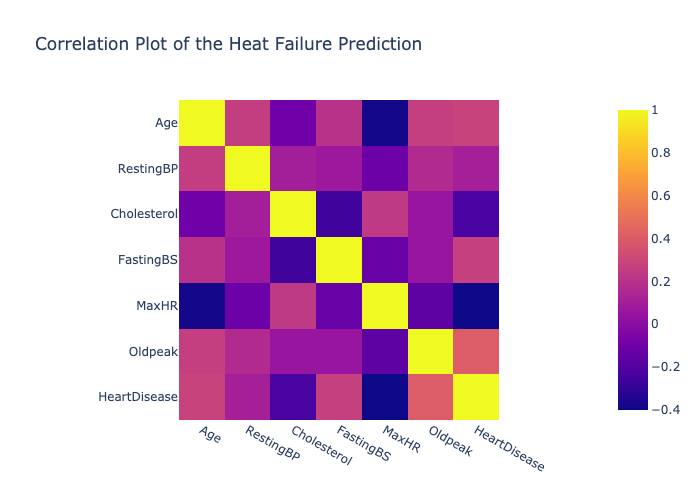

In [6]:
px.imshow(df.corr(), title="Correlation Plot of the Heat Failure Prediction")

Look at the correlation plot we can deduce
* Most of the correlations is pretty weak (between 0.4 & -0.4)
* There is a negative correlation between maxium heart rate & heart disease
* There is a negative correlation between cholesterol & heart disease

---

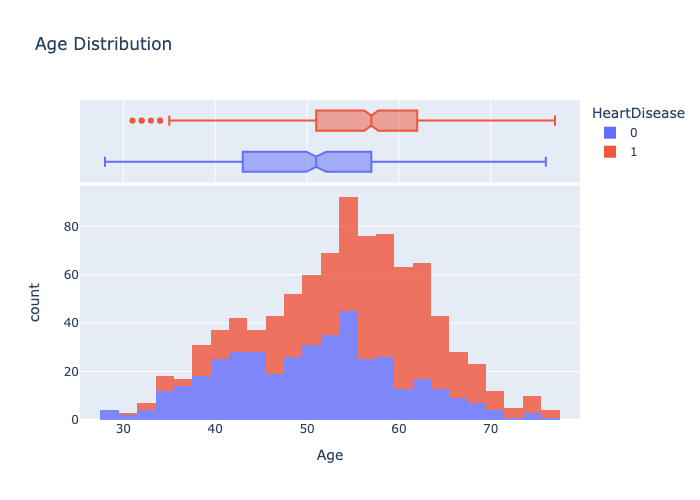

In [7]:
fig = px.histogram(df, x='Age', title='Age Distribution' , color='HeartDisease', opacity=0.8, marginal="box")
fig.show()

There seem to be a strong correlation between age and heart disease with meadian age of 57.

---

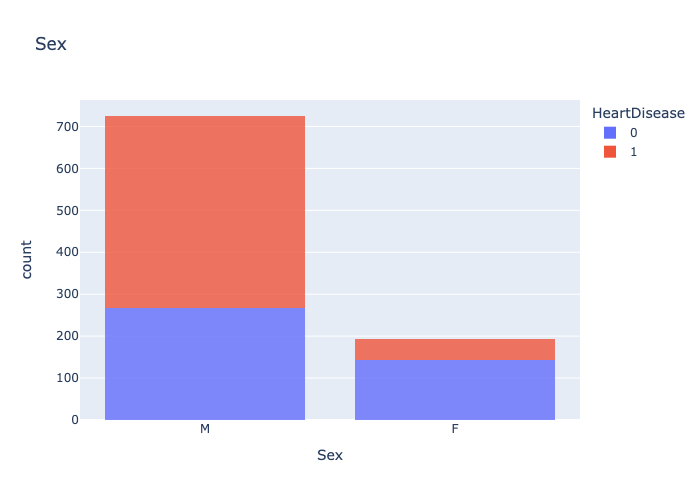

Sex  HeartDisease
F    0               0.740933
     1               0.259067
M    1               0.631724
     0               0.368276
Name: HeartDisease, dtype: float64

In [8]:
fig = px.histogram(df, x='Sex', title='Sex', color='HeartDisease', opacity=0.8)
fig.show()

df.groupby('Sex')['HeartDisease'].value_counts(normalize=True)

Gender seem to play a role in heart disease where the male gender is more likely to have heart disease vs female.  Here only ~26% of feamale have heart disease vs ~63% of mail have heart disease

---

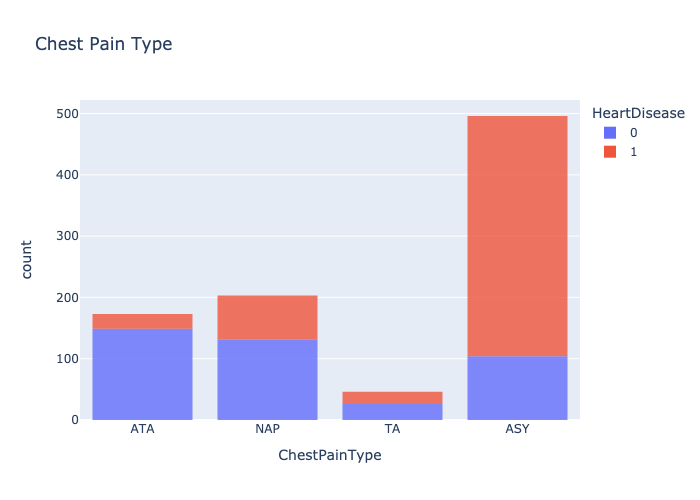

ChestPainType  HeartDisease
ASY            1               0.790323
               0               0.209677
ATA            0               0.861272
               1               0.138728
NAP            0               0.645320
               1               0.354680
TA             0               0.565217
               1               0.434783
Name: HeartDisease, dtype: float64

In [9]:
fig = px.histogram(df, x='ChestPainType', title='Chest Pain Type', color='HeartDisease', opacity=0.8)
fig.show()

df.groupby('ChestPainType')['HeartDisease'].value_counts(normalize=True)

Patients with asymptomatic (ASY) chest pain seem be more prone to heart disease since ~79% of patient with ASY has heart disease.

---

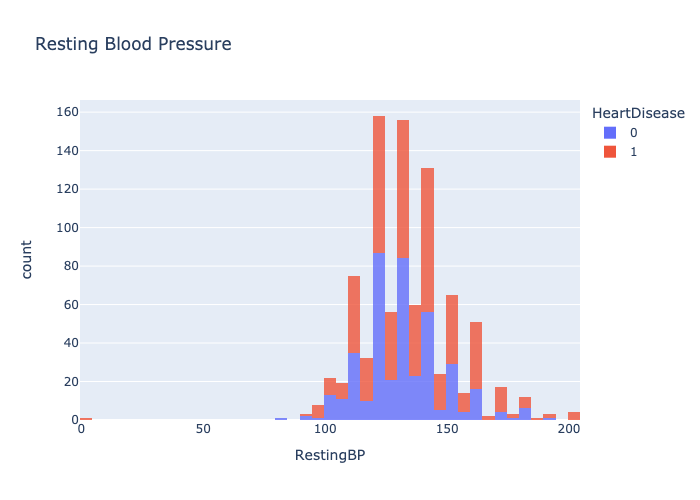

In [10]:
fig = px.histogram(df, x='RestingBP', title='Resting Blood Pressure', color='HeartDisease', opacity=0.8)
fig.show()



Not much from BP but there seem to be an outlier that we should address in the next section

---

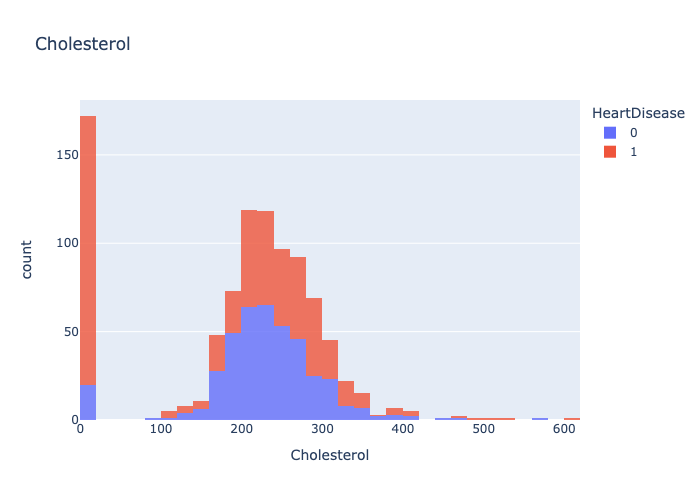

In [11]:
fig = px.histogram(df, x='Cholesterol', title='Cholesterol', color='HeartDisease', opacity=0.8)
fig.show()


Not much from Cholesterol but there seem to be an outlier that we should address in the next section

---

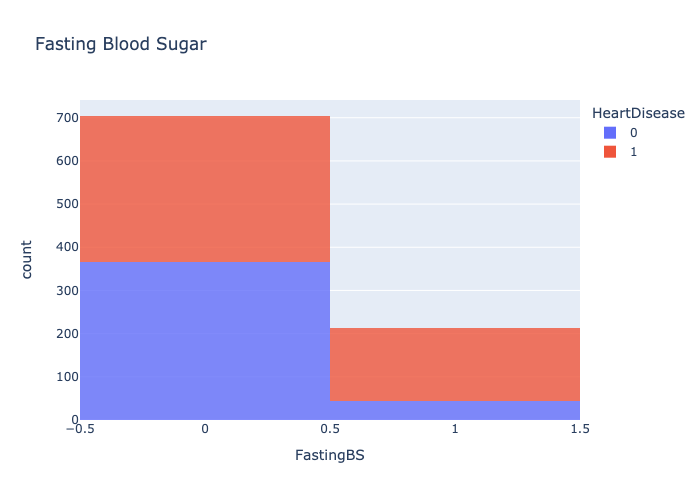

FastingBS  HeartDisease
0          0               0.519886
           1               0.480114
1          1               0.794393
           0               0.205607
Name: HeartDisease, dtype: float64

In [12]:
fig = px.histogram(df, x='FastingBS', title='Fasting Blood Sugar', color='HeartDisease', opacity=0.8)
fig.show()

df.groupby('FastingBS')['HeartDisease'].value_counts(normalize=True)

Patients with a fasting blood sugar > 120 mg/dl have a greater risk of heart disease.

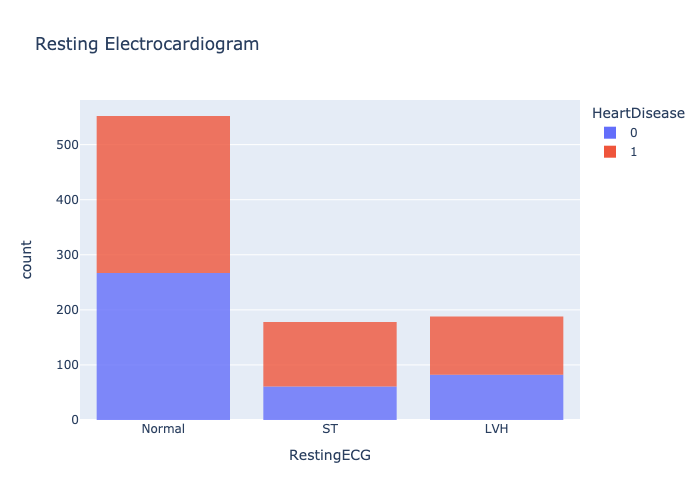

In [13]:
fig = px.histogram(df, x='RestingECG', title='Resting Electrocardiogram', color='HeartDisease', opacity=0.8)
fig.show()

Resting ECG doesn't seem to provide any significate different when it comes to heart disease

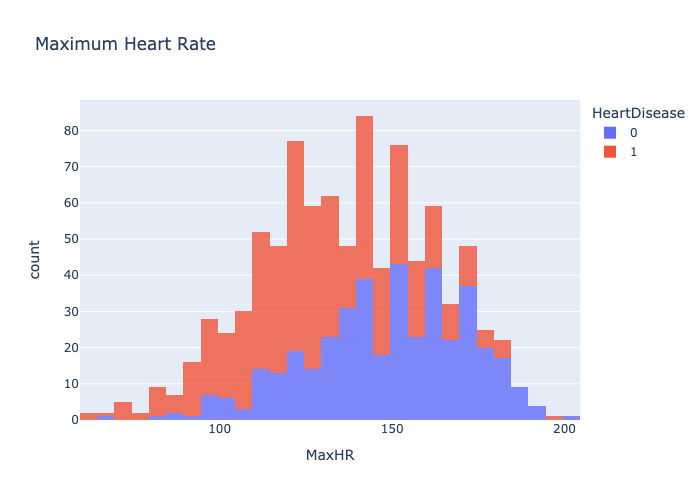

In [14]:
fig = px.histogram(df, x='MaxHR', title='Maximum Heart Rate', color='HeartDisease', opacity=0.8)
fig.show()

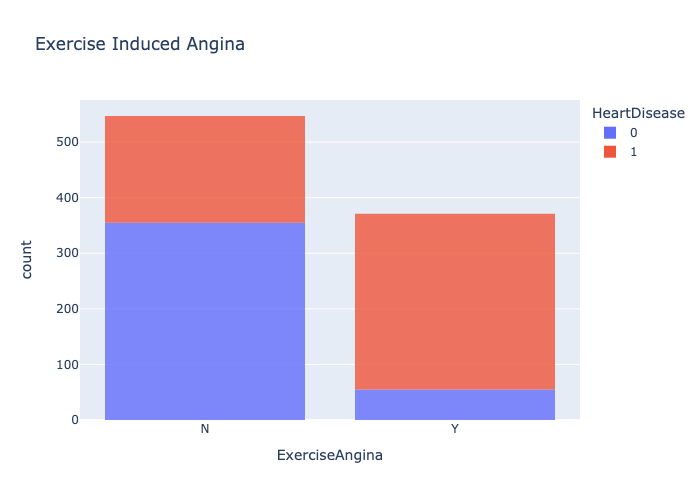

In [15]:
fig = px.histogram(df, x='ExerciseAngina', title='Exercise Induced Angina', color='HeartDisease', opacity=0.8)
fig.show()

Patient with exercise-induced angina of Y is more likely to have heart disease

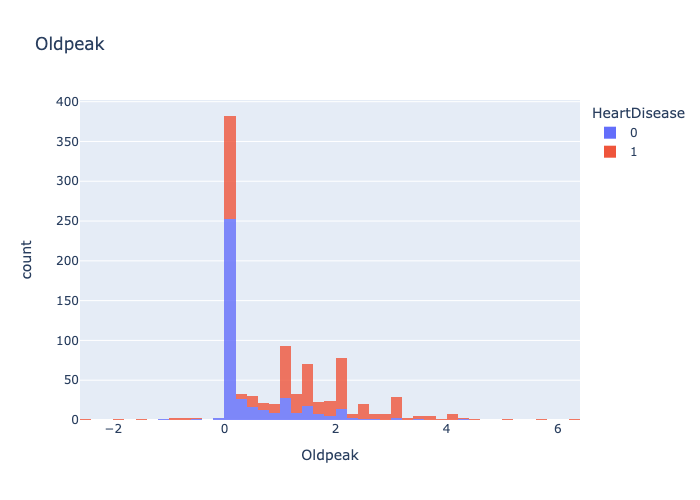

In [16]:
fig = px.histogram(df, x='Oldpeak', title='Oldpeak', color='HeartDisease', opacity=0.8)
fig.show()

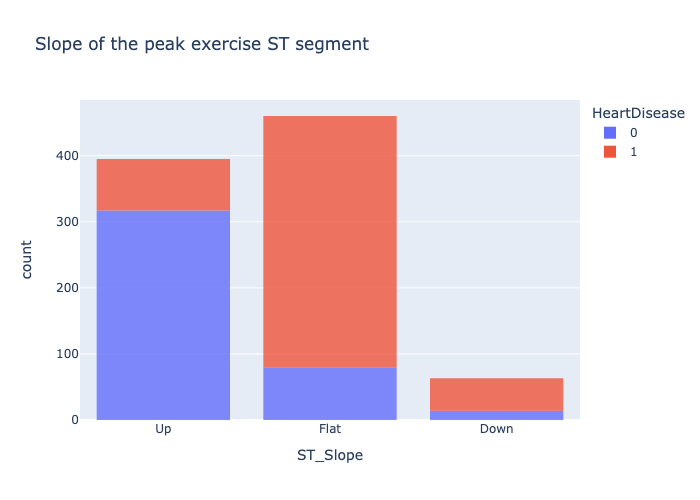

In [17]:
fig = px.histogram(df, x='ST_Slope', title='Slope of the peak exercise ST segment', color='HeartDisease', opacity=0.8)
fig.show()

* When the slope of the peak exercise ST segment if up then the patient is less likely to have heart disease
* When the slop is flat the patient is more likely to have heart disease

---

### Outliers

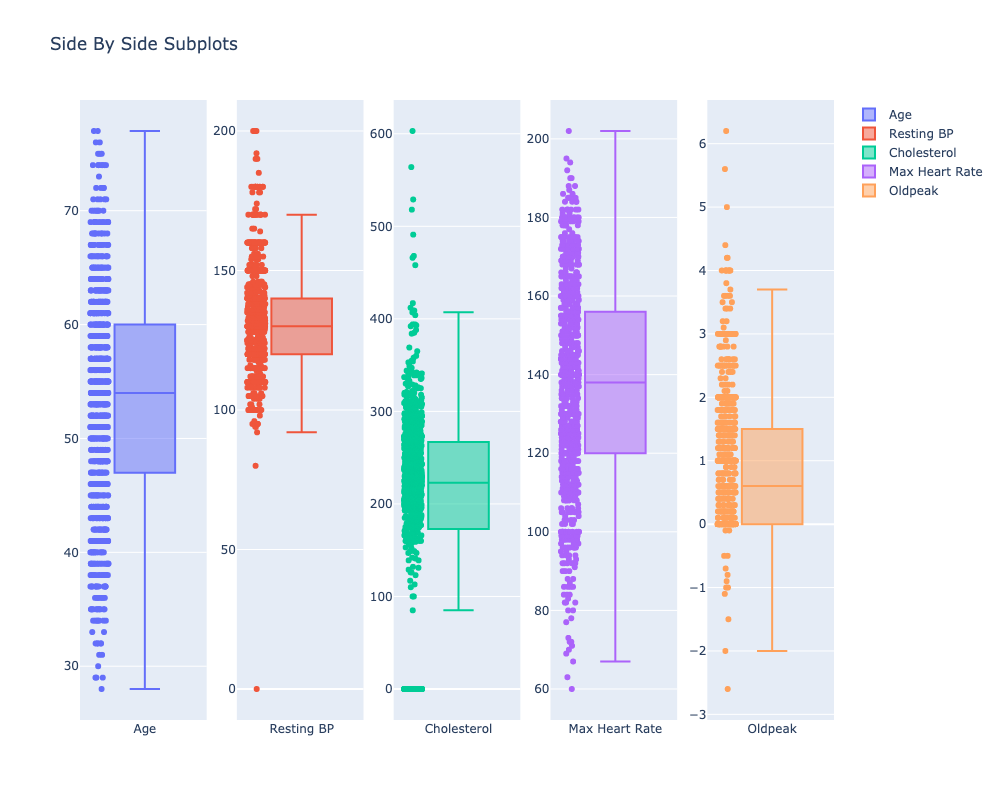

In [18]:

fig = make_subplots(rows=1, cols=5)
fig.add_trace(go.Box(y=df['Age'], name='Age'), row=1, col=1)
fig.add_trace(go.Box(y=df['RestingBP'], name='Resting BP'), row=1, col=2)
fig.add_trace(go.Box(y=df['Cholesterol'], name='Cholesterol'), row=1, col=3)
fig.add_trace(go.Box(y=df['MaxHR'], name='Max Heart Rate'), row=1, col=4)
fig.add_trace(go.Box(y=df['Oldpeak'], name='Oldpeak'), row=1, col=5)

fig.update_layout(height=800, width=1000, title_text="Side By Side Subplots")
fig.update_traces(boxpoints='all', jitter=.3)
fig.show()

There seem to be an outlier with Resting BP & Cholesterol which has a value of 0. Since resting BP & cholesterol can't be 0 we have 2 options here. We can either drop the data point or impute the value using the mean value. For this data point I will be imputing the value instead of droping it

In [19]:
df[df["RestingBP"] == 0]


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [20]:
df["RestingBP"].replace({0: 130}, inplace=True)
df["Cholesterol"].replace({0: 223}, inplace=True)

## Data Processing

We have 5 catgorical variables (Sex, Chest Pain Type, Resting ECG, Exercise Angina, ST Slopt).  Since computers don't understand text data wWe can use One Hot Encoding to convert them to a numeric value

In [21]:
catagory = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
df_processed = pd.get_dummies(df, columns=catagory, drop_first=False)

df_processed.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


# Baseline Model

### Logistic Regression 

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        77
           1       0.91      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184

Accuracy Score: 0.8641304347826086


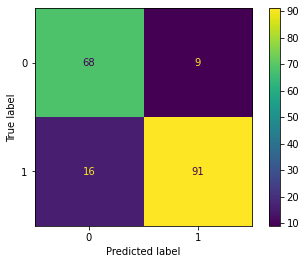

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score,  plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(df_processed.drop('HeartDisease', axis=1), df_processed['HeartDisease'], test_size = 0.2, random_state = 42)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_prediction = model.predict(X_test)

print(classification_report(y_test, y_prediction))
print(f'Accuracy Score: {accuracy_score(y_prediction, y_test)}')

plot_confusion_matrix(model, X_test, y_test)  
plt.show()


### K Nearest Neighbor

              precision    recall  f1-score   support

           0       0.58      0.69      0.63        77
           1       0.74      0.64      0.69       107

    accuracy                           0.66       184
   macro avg       0.66      0.67      0.66       184
weighted avg       0.68      0.66      0.67       184

Accuracy Score: 0.6630434782608695


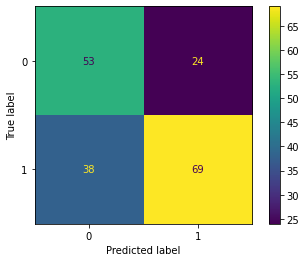

In [23]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(df_processed.drop('HeartDisease', axis=1), df_processed['HeartDisease'], test_size = 0.2, random_state = 42)

model = KNeighborsClassifier()
model.fit(X_train, y_train)

y_prediction = model.predict(X_test)

print(classification_report(y_test, y_prediction))
print(f'Accuracy Score: {accuracy_score(y_prediction, y_test)}')

plot_confusion_matrix(model, X_test, y_test)  
plt.show()


### Support Vector Machine

              precision    recall  f1-score   support

           0       0.57      0.61      0.59        77
           1       0.71      0.67      0.69       107

    accuracy                           0.65       184
   macro avg       0.64      0.64      0.64       184
weighted avg       0.65      0.65      0.65       184

Accuracy Score: 0.6467391304347826


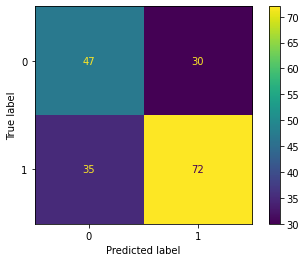

In [24]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(df_processed.drop('HeartDisease', axis=1), df_processed['HeartDisease'], test_size = 0.2, random_state = 42)

model = SVC()
model.fit(X_train,y_train)

y_prediction = model.predict(X_test)

print(classification_report(y_test, y_prediction))
print(f'Accuracy Score: {accuracy_score(y_prediction, y_test)}')

plot_confusion_matrix(model, X_test, y_test)  
plt.show()

### Decision Tree

              precision    recall  f1-score   support

           0       0.67      0.81      0.73        77
           1       0.84      0.72      0.77       107

    accuracy                           0.76       184
   macro avg       0.76      0.76      0.75       184
weighted avg       0.77      0.76      0.76       184

Accuracy Score: 0.7554347826086957


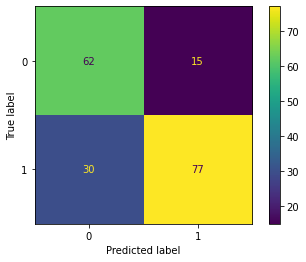

In [25]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(df_processed.drop('HeartDisease', axis=1), df_processed['HeartDisease'], test_size = 0.2, random_state = 42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_prediction = model.predict(X_test)

print(classification_report(y_test, y_prediction))
print(f'Accuracy Score: {accuracy_score(y_prediction, y_test)}')

plot_confusion_matrix(model, X_test, y_test)  
plt.show()

####  The best model was catboost regression model which have an accuracy score of 87.5%.  We will move on to model tunning to see if we can increase the accuracy

# Tuning the Model

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        77
           1       0.91      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184

Accuracy Score: 0.8641304347826086
Parameters: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}


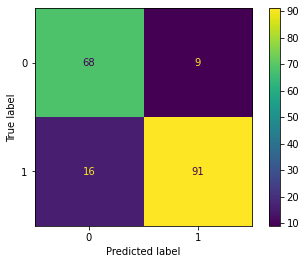

In [26]:
from sklearn.model_selection import GridSearchCV

hyperparameters = dict(C = np.logspace(0, 4, num=10), penalty = ['l1', 'l2'], solver = ['liblinear', 'saga'])

grid = GridSearchCV(LogisticRegression(random_state=42), hyperparameters)
grid.fit(X_train, y_train)

y_prediction = grid.predict(X_test)

print(classification_report(y_test, y_prediction))
print(f'Accuracy Score: {accuracy_score(y_prediction, y_test)}')
print("Parameters:", grid.best_params_)

plot_confusion_matrix(grid, X_test, y_test)  
plt.show()

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        77
           1       0.91      0.84      0.87       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

Accuracy Score: 0.8586956521739131
Parameters: {'C': 0.22378373548205133, 'penalty': 'l2'}


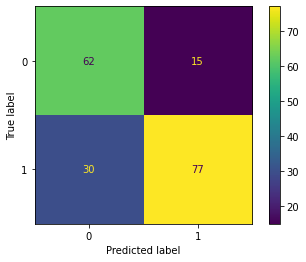

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

hyperparameters = dict(C=uniform(loc=0, scale=4), penalty=['l1', 'l2'])

rs = RandomizedSearchCV(LogisticRegression(random_state=42), hyperparameters, n_iter=100, cv=5, verbose=0, n_jobs=1)
rs.fit(X_train, y_train)

y_prediction = rs.predict(X_test)

print(classification_report(y_test, y_prediction))
print(f'Accuracy Score: {accuracy_score(y_prediction, y_test)}')
print("Parameters:", rs.best_params_)

# Accuracy Score: 0.8695652173913043
# Parameters: {'C': 0.11565324209693495, 'penalty': 'l2'}

# Accuracy Score: 0.8731884057971014
# Parameters: {'C': 0.36077599201957566, 'penalty': 'l2'}

plot_confusion_matrix(model, X_test, y_test)  
plt.show()


##  Best Fit Model From Randomized Search

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        77
           1       0.91      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184

Accuracy Score: 0.8641304347826086


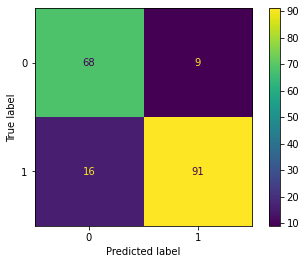

In [28]:
model = LogisticRegression(random_state=42, C = 0.36077599201957566, penalty = 'l2')
model.fit(X_train, y_train)

y_prediction = model.predict(X_test)

print(classification_report(y_test, y_prediction))
print(f'Accuracy Score: {accuracy_score(y_prediction, y_test)}')

plot_confusion_matrix(model, X_test, y_test)  
plt.show()

## Logistic Regression using TensorFlow

2022-03-28 10:27:38.829188: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
74/74 - 1s - loss: 1.1147 - accuracy: 0.6798 - val_loss: 0.4694 - val_accuracy: 0.7826 - 838ms/epoch - 11ms/step
Epoch 2/100
74/74 - 0s - loss: 0.4839 - accuracy: 0.7670 - val_loss: 0.4569 - val_accuracy: 0.7935 - 147ms/epoch - 2ms/step
Epoch 3/100
74/74 - 0s - loss: 0.4356 - accuracy: 0.8106 - val_loss: 0.3896 - val_accuracy: 0.8370 - 138ms/epoch - 2ms/step
Epoch 4/100
74/74 - 0s - loss: 0.5117 - accuracy: 0.7643 - val_loss: 0.4849 - val_accuracy: 0.7500 - 143ms/epoch - 2ms/step
Epoch 5/100
74/74 - 0s - loss: 0.4039 - accuracy: 0.8297 - val_loss: 0.5764 - val_accuracy: 0.7065 - 141ms/epoch - 2ms/step
Epoch 6/100
74/74 - 0s - loss: 0.4000 - accuracy: 0.8297 - val_loss: 0.5759 - val_accuracy: 0.7283 - 141ms/epoch - 2ms/step
Epoch 7/100
74/74 - 0s - loss: 0.3735 - accuracy: 0.8515 - val_loss: 0.3562 - val_accuracy: 0.8587 - 151ms/epoch - 2ms/step
Epoch 8/100
74/74 - 0s - loss: 0.4085 - accuracy: 0.8243 - val_loss: 0.6064 - val_accuracy: 0.7283 - 146ms/epoch - 2ms/step
Epoch 9

Epoch 67/100
74/74 - 0s - loss: 0.3816 - accuracy: 0.8569 - val_loss: 0.3246 - val_accuracy: 0.8804 - 106ms/epoch - 1ms/step
Epoch 68/100
74/74 - 0s - loss: 0.3747 - accuracy: 0.8610 - val_loss: 0.3300 - val_accuracy: 0.8913 - 86ms/epoch - 1ms/step
Epoch 69/100
74/74 - 0s - loss: 0.4091 - accuracy: 0.8283 - val_loss: 0.2934 - val_accuracy: 0.8913 - 108ms/epoch - 1ms/step
Epoch 70/100
74/74 - 0s - loss: 0.4214 - accuracy: 0.8365 - val_loss: 0.7118 - val_accuracy: 0.7065 - 112ms/epoch - 2ms/step
Epoch 71/100
74/74 - 0s - loss: 0.3988 - accuracy: 0.8392 - val_loss: 0.5232 - val_accuracy: 0.7717 - 82ms/epoch - 1ms/step
Epoch 72/100
74/74 - 0s - loss: 0.3729 - accuracy: 0.8529 - val_loss: 0.3258 - val_accuracy: 0.8587 - 98ms/epoch - 1ms/step
Epoch 73/100
74/74 - 0s - loss: 0.4121 - accuracy: 0.8229 - val_loss: 0.4300 - val_accuracy: 0.7935 - 100ms/epoch - 1ms/step
Epoch 74/100
74/74 - 0s - loss: 0.3798 - accuracy: 0.8515 - val_loss: 0.3211 - val_accuracy: 0.8478 - 98ms/epoch - 1ms/step
Epoc

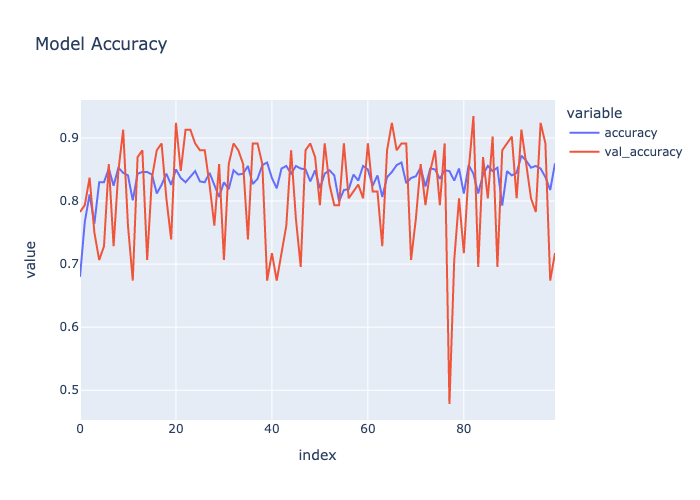

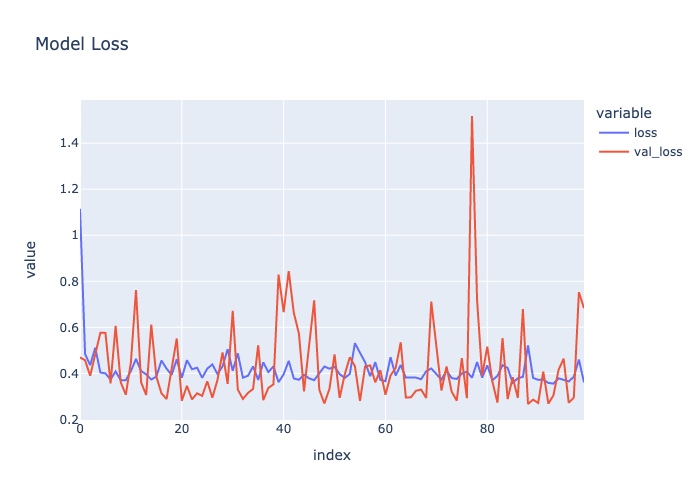

In [29]:
import tensorflow as tf
from sklearn.model_selection import train_test_split


df_processed = pd.get_dummies(df, columns=catagory, drop_first=False)

features = df_processed.drop('HeartDisease', axis=1)
target = df_processed['HeartDisease']

# split the dataset (train: 80%, validation: 10%, test: 10%)
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5, random_state = 42)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
#     tf.keras.layers.Dense(1, input_dim=len(features.columns), activation='sigmoid'),    
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=10, verbose=2)
print()
print('-----------------------------------------')
print()
print('training records:', len(x_train), "{0:.0f}%".format(len(x_train)/len(features)*100))
print('validation records:', len(x_val), "{0:.0f}%".format(len(x_val)/len(features)*100))
print('test records:', len(x_test), "{0:.0f}%".format(len(x_test)/len(features)*100))
print()
print('-----------------------------------------')
print()
# model.evaluate(x_train, y_train, verbose=2)
# model.evaluate(x_val, y_val, verbose=2)
model.evaluate(x_test, y_test, verbose=2)

hist_df = pd.DataFrame(history.history)

fig = px.line(hist_df, y=["accuracy", "val_accuracy"], title='Model Accuracy',)
fig.show()

fig = px.line(hist_df, y=["loss", "val_loss"], title='Model Loss',)
fig.show()

Epoch 1/100
74/74 - 1s - loss: 4.2128 - accuracy: 0.4441 - val_loss: 1.3132 - val_accuracy: 0.5652 - 586ms/epoch - 8ms/step
Epoch 2/100
74/74 - 0s - loss: 1.8554 - accuracy: 0.4728 - val_loss: 1.0933 - val_accuracy: 0.4457 - 115ms/epoch - 2ms/step
Epoch 3/100
74/74 - 0s - loss: 0.8506 - accuracy: 0.6144 - val_loss: 0.6507 - val_accuracy: 0.6739 - 124ms/epoch - 2ms/step
Epoch 4/100
74/74 - 0s - loss: 0.5762 - accuracy: 0.7343 - val_loss: 0.5778 - val_accuracy: 0.7174 - 129ms/epoch - 2ms/step
Epoch 5/100
74/74 - 0s - loss: 0.4908 - accuracy: 0.7629 - val_loss: 0.5288 - val_accuracy: 0.7391 - 127ms/epoch - 2ms/step
Epoch 6/100
74/74 - 0s - loss: 0.4430 - accuracy: 0.8120 - val_loss: 0.3862 - val_accuracy: 0.8478 - 134ms/epoch - 2ms/step
Epoch 7/100
74/74 - 0s - loss: 0.4528 - accuracy: 0.7902 - val_loss: 0.3520 - val_accuracy: 0.8587 - 124ms/epoch - 2ms/step
Epoch 8/100
74/74 - 0s - loss: 0.4196 - accuracy: 0.8297 - val_loss: 0.3458 - val_accuracy: 0.8587 - 94ms/epoch - 1ms/step
Epoch 9/1

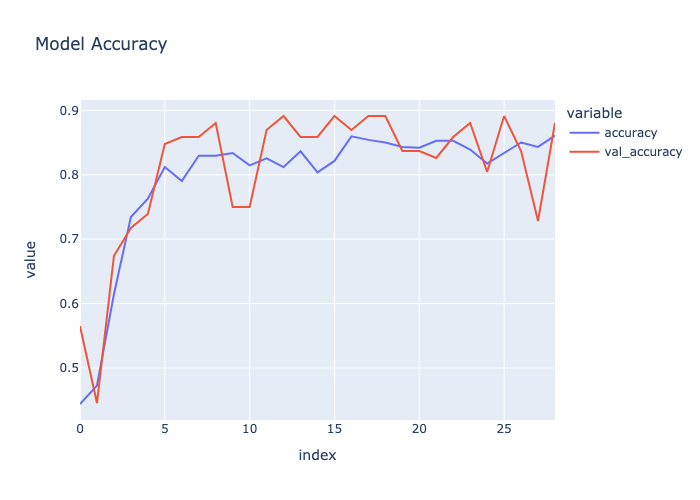

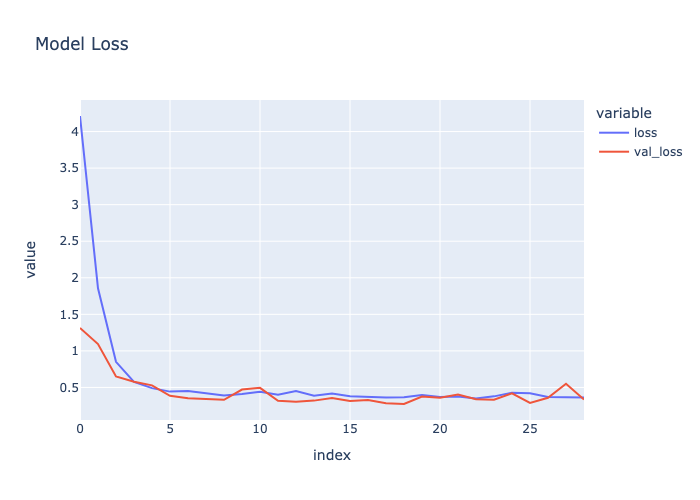

In [30]:
import tensorflow as tf
from sklearn.model_selection import train_test_split


df_processed = pd.get_dummies(df, columns=catagory, drop_first=False)

features = df_processed.drop('HeartDisease', axis=1)
target = df_processed['HeartDisease']

# split the dataset (train: 80%, validation: 10%, test: 10%)
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size = 0.5, random_state = 42)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=10, verbose=2, callbacks=[callback])
print()
print('-----------------------------------------')
print()
print('training records:', len(x_train), "{0:.0f}%".format(len(x_train)/len(features)*100))
print('validation records:', len(x_val), "{0:.0f}%".format(len(x_val)/len(features)*100))
print('test records:', len(x_test), "{0:.0f}%".format(len(x_test)/len(features)*100))
print()
print('-----------------------------------------')
print()
# model.evaluate(x_train, y_train, verbose=2)
# model.evaluate(x_val, y_val, verbose=2)
model.evaluate(x_test, y_test, verbose=2)


hist_df = pd.DataFrame(history.history)

fig = px.line(hist_df, y=["accuracy", "val_accuracy"], title='Model Accuracy',)
fig.show()

fig = px.line(hist_df, y=["loss", "val_loss"], title='Model Loss',)
fig.show()



In [31]:
# try reduce learning rate
# try increase patient size
# look into instance that generate the spike (* explorer)

# plot feature importants (tree base) - read up on this
# stream lit (deploying the model - container, api, web interface)

Accuracy for Neural Network is 0.8536

# XGBoost, LightGBM, Catboot 

### XGBoost Classifier

[10:27:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.76      0.86      0.80        77
           1       0.89      0.80      0.84       107

    accuracy                           0.83       184
   macro avg       0.82      0.83      0.82       184
weighted avg       0.83      0.83      0.83       184

Accuracy Score: 0.8260869565217391


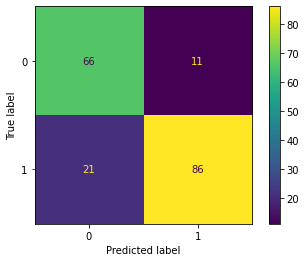

In [32]:
from xgboost import XGBClassifier

X = df_processed.drop('HeartDisease', axis=1)
y = df_processed['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

model=XGBClassifier()
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0)

y_prediction = model.predict(X_test)

print(classification_report(y_test, y_prediction))
print(f'Accuracy Score: {accuracy_score(y_prediction, y_test)}')

plot_confusion_matrix(model, X_test, y_test)  
plt.show()


### LGBM Classifier

In [43]:
from lightgbm import LGBMClassifier

X = df_processed.drop('HeartDisease', axis=1)
y = df_processed['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

model=LGBMClassifier()
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0)

y_prediction = model.predict(X_test)

print(classification_report(y_test, y_prediction))
print(f'Accuracy Score: {accuracy_score(y_prediction, y_test)}')

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        77
           1       0.91      0.83      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184

Accuracy Score: 0.8532608695652174


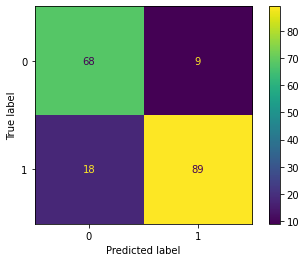

In [44]:
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

## Catboost Classifier

In [41]:
from catboost import CatBoostClassifier

X = df_processed.drop('HeartDisease', axis=1)
y = df_processed['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

model=CatBoostClassifier(silent=True, random_state=0)
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0)

y_prediction = model.predict(X_test)

print(classification_report(y_test, y_prediction))
print(f'Accuracy Score: {accuracy_score(y_prediction, y_test)}')

              precision    recall  f1-score   support

           0       0.85      0.86      0.85        77
           1       0.90      0.89      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184

Accuracy Score: 0.875


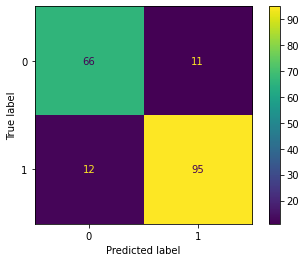

In [42]:
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

### Catboost HyperParameter Tuning with Optuna

[I 2022-03-28 10:27:58,428] A new study created in memory with name: no-name-0cf66899-bfd9-4e02-803c-03936000f85f
[I 2022-03-28 10:27:58,718] Trial 0 finished with value: 0.8641304347826086 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.030937904099453337, 'depth': 4, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 0 with value: 0.8641304347826086.
[I 2022-03-28 10:27:59,008] Trial 1 finished with value: 0.8641304347826086 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.045103462126567004, 'depth': 5, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.5671679853663013}. Best is trial 0 with value: 0.8641304347826086.
[I 2022-03-28 10:27:59,560] Trial 2 finished with value: 0.8532608695652174 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.02695813069477103, 'depth': 1, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 0 with value: 0.8641304347826086.
[I 2022-03-28 10:28:00,21

[I 2022-03-28 10:28:09,678] Trial 26 finished with value: 0.875 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.09061616380120387, 'depth': 4, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 1.6045427164841857}. Best is trial 15 with value: 0.9021739130434783.
[I 2022-03-28 10:28:09,961] Trial 27 finished with value: 0.875 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.072247902819183, 'depth': 7, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 0.005419243965171072}. Best is trial 15 with value: 0.9021739130434783.
[I 2022-03-28 10:28:10,248] Trial 28 finished with value: 0.8586956521739131 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.09537061752127073, 'depth': 2, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 3.8771751821654186}. Best is trial 15 with value: 0.9021739130434783.
[I 2022-03-28 10:28:10,509] Trial 29 finished wi

[I 2022-03-28 10:28:19,238] Trial 52 finished with value: 0.8967391304347826 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.09871260609241052, 'depth': 3, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 0.05012737885423135}. Best is trial 34 with value: 0.907608695652174.
[I 2022-03-28 10:28:19,528] Trial 53 finished with value: 0.875 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.0919711264090568, 'depth': 2, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 0.04072527780475893}. Best is trial 34 with value: 0.907608695652174.
[I 2022-03-28 10:28:19,847] Trial 54 finished with value: 0.875 and parameters: {'objective': 'CrossEntropy', 'colsample_bylevel': 0.09505246930469764, 'depth': 5, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.31640358375909805}. Best is trial 34 with value: 0.907608695652174.
[I 2022-03-28 10:28:20,153] Trial 55 finished with value: 

[I 2022-03-28 10:28:32,824] Trial 78 finished with value: 0.8586956521739131 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.0842129359509681, 'depth': 7, 'boosting_type': 'Ordered', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 3.4168604847650483}. Best is trial 34 with value: 0.907608695652174.
[I 2022-03-28 10:28:33,810] Trial 79 finished with value: 0.8913043478260869 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.08787190792284151, 'depth': 5, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 34 with value: 0.907608695652174.
[I 2022-03-28 10:28:34,399] Trial 80 finished with value: 0.8641304347826086 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.034450768367037164, 'depth': 8, 'boosting_type': 'Ordered', 'bootstrap_type': 'MVS'}. Best is trial 34 with value: 0.907608695652174.
[I 2022-03-28 10:28:35,726] Trial 81 finished with value: 0.875 and parameters: {'objective': 'Logloss', 'colsample_bylevel': 0.09

Best trial:  0.907608695652174
Best Params:  {'objective': 'CrossEntropy', 'colsample_bylevel': 0.09539798784075991, 'depth': 4, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 0.049294548770187775}


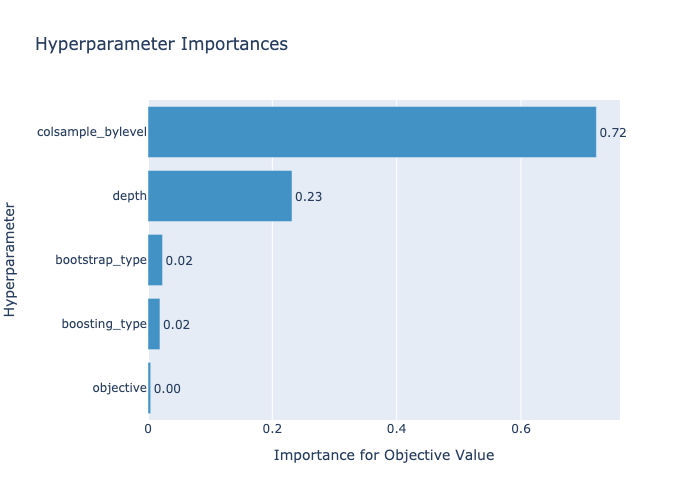

In [35]:
import optuna

X = df_processed.drop('HeartDisease', axis=1)
y = df_processed['HeartDisease']

def objective(trial):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

    param = {
        "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]),
        "used_ram_limit": "3gb",
    }    

    # Conditional Hyper-Parameters    
    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

    # fit the model
    model=CatBoostClassifier(**param)
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=100)

    # predict results
    y_prediction = model.predict(X_test)

    accuracy = accuracy_score(y_prediction, y_test)
    return accuracy

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

print("Best trial: ", study.best_trial.value)
print("Best Params: ", study.best_params)

# visualize hyper parameter importance
optuna.visualization.plot_param_importances(study)


# Final Model Using Catboost Classifier With New Parameters 

In [39]:
from catboost import CatBoostClassifier

X = df_processed.drop('HeartDisease', axis=1)
y = df_processed['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
    
model=CatBoostClassifier(silent=True,  
                         objective='Logloss', 
                         colsample_bylevel=0.07241794279026305, 
                         depth=12, 
                         boosting_type='Plain', 
                         bootstrap_type='MVS')
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0)    
    
y_prediction = model.predict(X_test)

print(classification_report(y_test, y_prediction))
print(f'Accuracy Score: {accuracy_score(y_prediction, y_test)}')

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        77
           1       0.94      0.91      0.92       107

    accuracy                           0.91       184
   macro avg       0.91      0.91      0.91       184
weighted avg       0.91      0.91      0.91       184

Accuracy Score: 0.9130434782608695


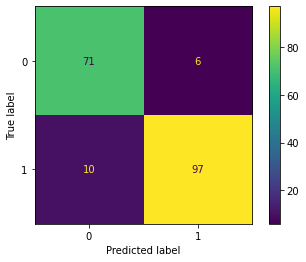

In [40]:
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

### Feature Importants for Catboost Modal

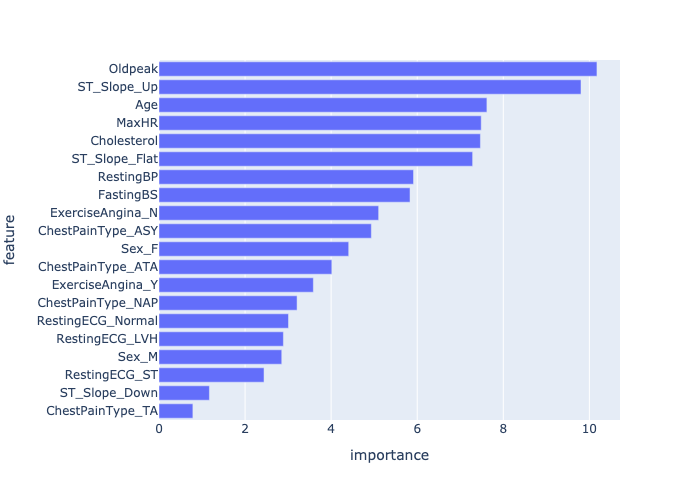

In [37]:
feature_importance = pd.DataFrame({'feature':list(X_train.columns),'importance':model.get_feature_importance()})
feature_importance = feature_importance.sort_values('importance')
fig = px.bar(feature_importance, x='importance', y='feature', orientation='h')
fig.show()

### Save model for us in production

In [38]:
model.save_model("model")

## Conclusion:  

Of all the different model that was experimented with the Catboost classifier provider the best results. Using this as the baseline model and using optuna to tune the hyperparameters our model ended up with an accuracy score of 0.913.  We can also see which features impact the model more by ploting the feature importance in a bar graph.  

In [ ]:
# docker - deploy to cloud solution
# upload to docker hub
# push to aws instance
# go though my course - submit missing
